Step 1: Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


Step 2: Load the dataset

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Threat_Prediction_Data.csv')


The dataset contains 50,000 entries and 22 columns, detailing machine and security attributes such as MachineId, ProductName, Platform, Processor, IsProtected, Firewall status, and whether the machine is infected. This data helps in analyzing and predicting potential cybersecurity threats based on various system and security configurations.

Step 3: Explore the Data

In [ ]:
# Display the first few rows of the dataset
data.head()


,MachineId,ProductName,HasTpm,Platform,Processor,SkuEdition,IsProtected,Firewall,AdminApprovalMode,DeviceType,...,SystemVolumeTotalCapacity,HasOpticalDiskDrive,TotalPhysicalRAM,AutoUpdate,GenuineStateOS,IsSecureBootEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,IsInfected
0,0000028988387b115f69f31a3bf04f09,win8defender,1,windows10,x64,Pro,0.0,1.0,1.0,Desktop,...,299451.0,0,4096.0,UNKNOWN,Invalid,1.0,0,1.0,0.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1,windows10,x64,Pro,0.0,1.0,1.0,Notebook,...,102385.0,0,4096.0,UNKNOWN,OFFLINE,1.0,0,1.0,0.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1,windows10,x64,Home,0.0,1.0,1.0,Desktop,...,113907.0,0,4096.0,NOTIFY,Invalid,1.0,0,1.0,0.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1,windows10,x64,Pro,0.0,1.0,1.0,Desktop,...,227116.0,0,4096.0,NOTIFY,Invalid,1.0,0,1.0,0.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1,windows10,x64,Home,0.0,1.0,1.0,Notebook,...,101900.0,0,6144.0,NOTIFY,Invalid,1.0,0,1.0,0.0,1


Step 4: Check Summary Statistics

Objective: Understand the distribution and central tendency of your data.

* .describe(): Generates descriptive statistics such as mean, standard deviation, min, and max for numeric columns.





In [ ]:
# Display summary statistics
data.describe()


,HasTpm,IsProtected,Firewall,AdminApprovalMode,PrimaryDiskTotalCapacity,SystemVolumeTotalCapacity,HasOpticalDiskDrive,TotalPhysicalRAM,IsSecureBootEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,IsInfected
count,50000.000000,46951.000000,49447.000000,49942.000000,4.968600e+04,4.968600e+04,50000.000000,49536.000000,46951.000000,50000.000000,44241.000000,48304.000000,50000.000000
mean,0.987360,0.054781,0.977248,0.993613,5.126928e+05,3.761569e+05,0.075860,6115.658592,0.506379,0.037560,0.940666,0.281074,0.501220
std,0.111716,0.227554,0.149112,0.079666,3.544110e+05,3.225250e+05,0.264777,4677.424574,0.499965,0.190131,0.236252,0.449528,0.500004
min,0.000000,0.000000,0.000000,0.000000,1.068000e+04,1.012900e+04,0.000000,512.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,2.384750e+05,1.207150e+05,0.000000,4096.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,4.769400e+05,2.488450e+05,0.000000,4096.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,9.538690e+05,4.759690e+05,0.000000,8192.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,3.815447e+06,3.814782e+06,1.000000,131072.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Step 5: Check Data Types and Missing Values

Objective: Identify the data types of columns and check for missing values.

* .isnull().sum(): Counts the number of missing values in each column.

In [ ]:
# Display data types and missing values
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MachineId                         50000 non-null  object 
 1   ProductName                       50000 non-null  object 
 2   HasTpm                            50000 non-null  int64  
 3   Platform                          50000 non-null  object 
 4   Processor                         50000 non-null  object 
 5   SkuEdition                        50000 non-null  object 
 6   IsProtected                       46951 non-null  float64
 7   Firewall                          49447 non-null  float64
 8   AdminApprovalMode                 49942 non-null  float64
 9   DeviceType                        50000 non-null  object 
 10  PrimaryDiskTotalCapacity          49686 non-null  float64
 11  PrimaryDiskTypeName               49917 non-null  object 
 12  Syst

MachineId                              0
ProductName                            0
HasTpm                                 0
Platform                               0
Processor                              0
SkuEdition                             0
IsProtected                         3049
Firewall                             553
AdminApprovalMode                     58
DeviceType                             0
PrimaryDiskTotalCapacity             314
PrimaryDiskTypeName                   83
SystemVolumeTotalCapacity            314
HasOpticalDiskDrive                    0
TotalPhysicalRAM                     464
AutoUpdate                          5759
GenuineStateOS                      3049
IsSecureBootEnabled                 3049
IsPenCapable                           0
IsAlwaysOnAlwaysConnectedCapable    5759
IsGamer                             1696
IsInfected                             0
dtype: int64

Step 6: Visualize the Data

Objective: Perform univariate and bivariate analysis using visualizations.
Visualization is a crucial part of data analysis as it helps in understanding the data better by revealing patterns, trends, and anomalies. In this step, we will perform both univariate and bivariate analysis using various visualization techniques.

1. Univariate Analysis

Univariate analysis involves analyzing one variable at a time. It helps in understanding the distribution and characteristics of individual variables.

Histograms:

* Histograms are used to understand the distribution of a single numeric
variable.
* They display the frequency of data points within specified ranges (bins).

Box Plots:

* Box plots (or box-and-whisker plots) are used to visualize the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.
* They are particularly useful for detecting outliers.

2. Bivariate Analysis

Bivariate analysis involves analyzing two variables simultaneously to understand the relationship between them.

Correlation Heatmap:

* A correlation matrix shows the correlation coefficients between pairs of variables.
* The heatmap provides a visual representation of the correlation matrix, where colors represent the strength of correlations.

Scatter Plots:

* Scatter plots show the relationship between two numeric variables.
* They help in identifying trends, patterns, and potential outliers.






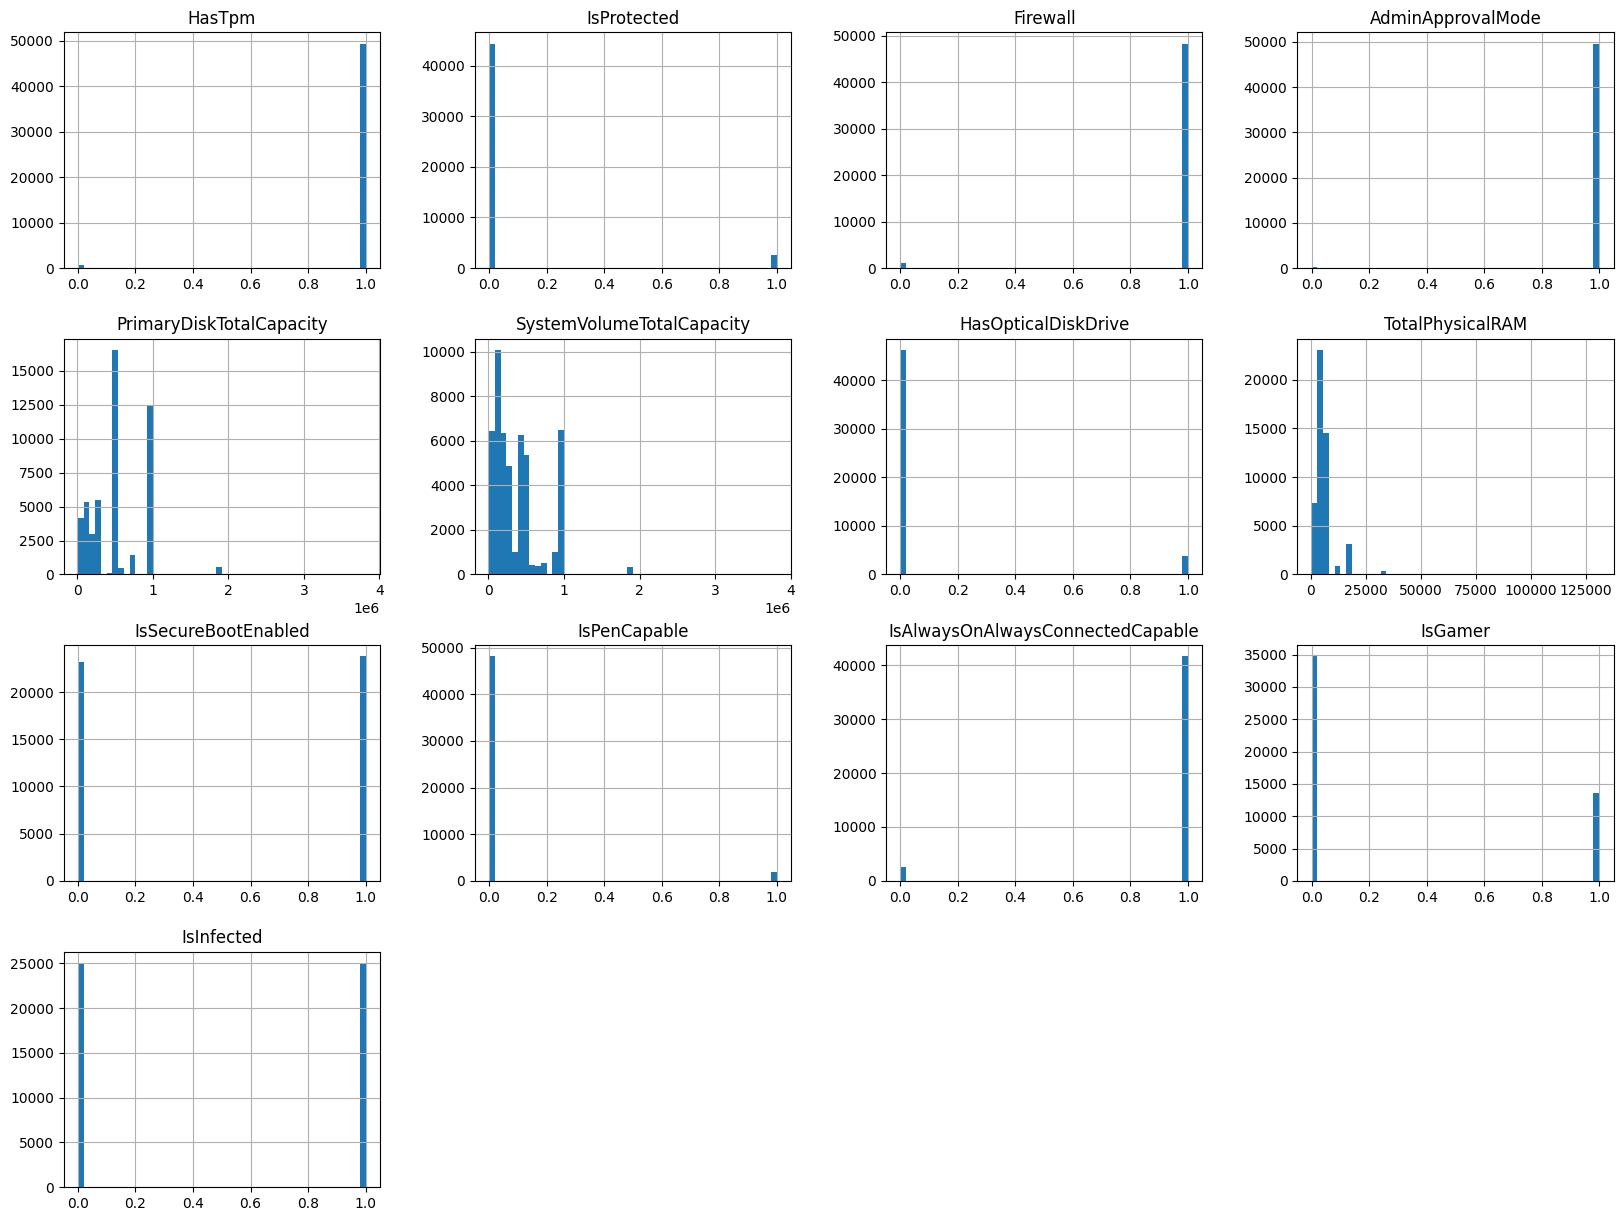

In [ ]:
# Visualize the Data - Univariate Analysis

# Histograms
data.hist(bins=50, figsize=(20,15))
plt.show()


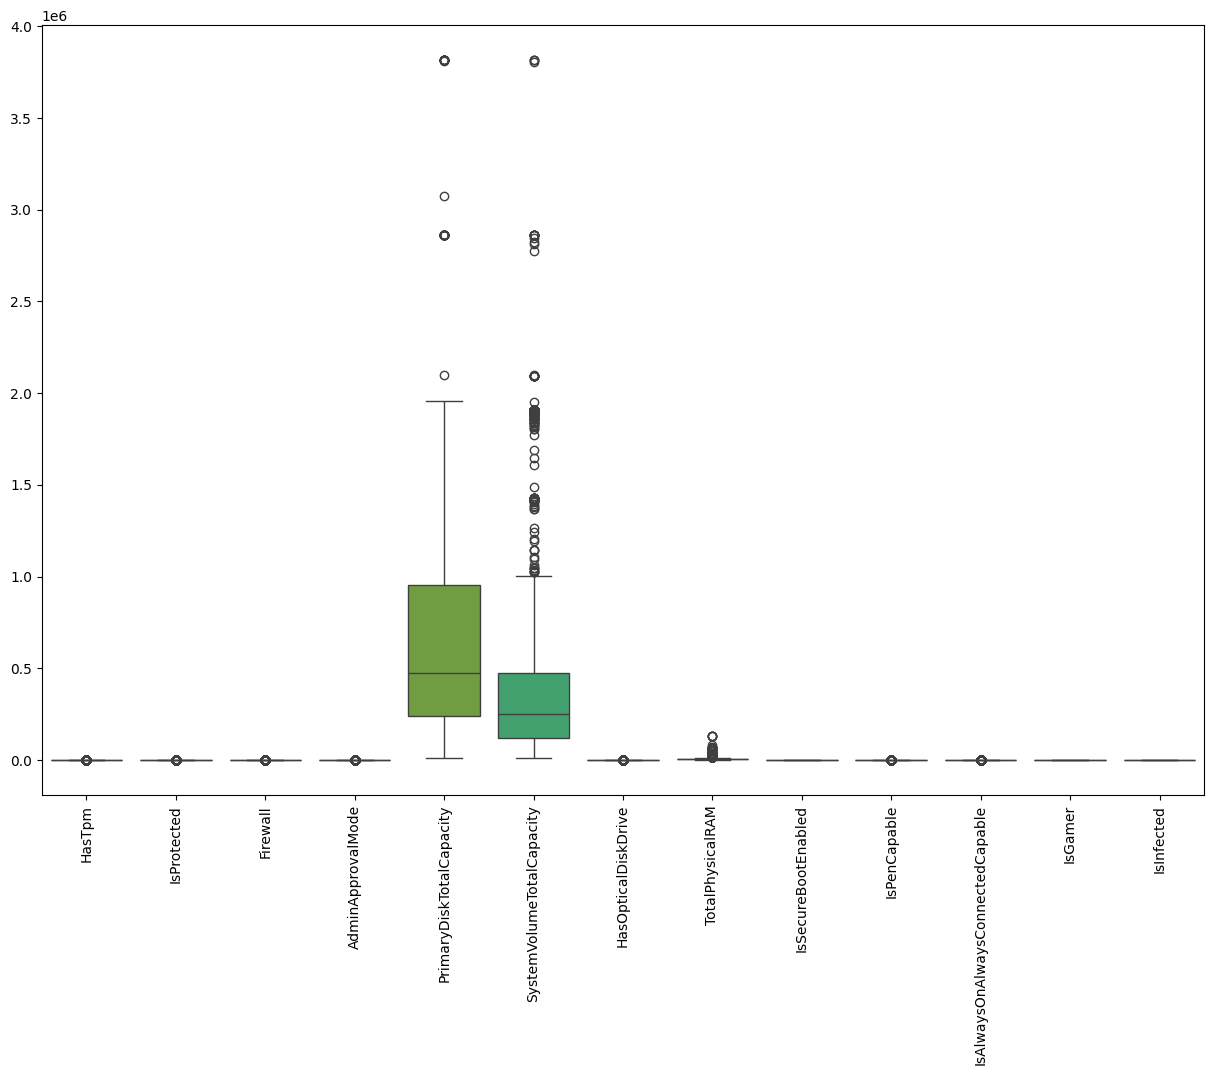

In [ ]:
# Box plots for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


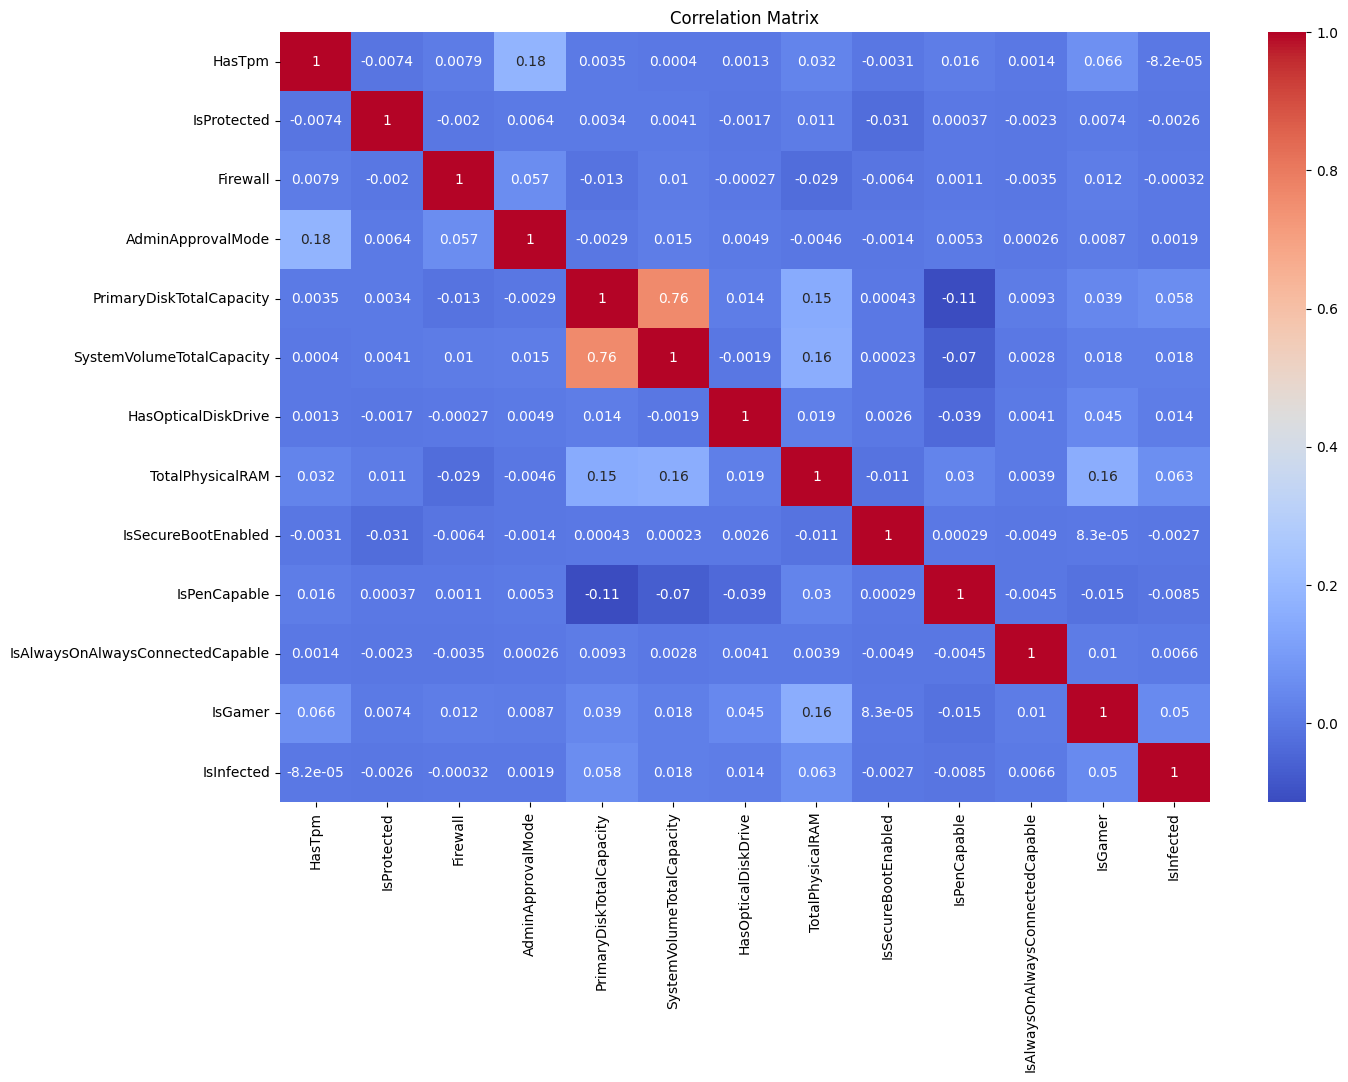

In [ ]:
# Visualize the Data-Bivariate Analysis
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Step 7: Advanced Analysis

Objective: Perform more complex analysis such as grouping and aggregation.

Grouping and aggregation allow you to summarize data and explore patterns within specific subsets of your data.

* .groupby(): Group data by a specific column and calculate aggregate statistics.




In [ ]:
# Advanced Analysis - Grouping and Aggregation

# Print the column names to identify the correct column
print(data.columns)

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Grouping by Platform and calculating the mean
grouped_by_platform = numeric_data.groupby(data['Platform']).mean()
print(grouped_by_platform)



Index(['MachineId', 'ProductName', 'HasTpm', 'Platform', 'Processor',
       'SkuEdition', 'IsProtected', 'Firewall', 'AdminApprovalMode',
       'DeviceType', 'PrimaryDiskTotalCapacity', 'PrimaryDiskTypeName',
       'SystemVolumeTotalCapacity', 'HasOpticalDiskDrive', 'TotalPhysicalRAM',
       'AutoUpdate', 'GenuineStateOS', 'IsSecureBootEnabled', 'IsPenCapable',
       'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'IsInfected'],
      dtype='object')
               HasTpm  IsProtected  Firewall  AdminApprovalMode  \
Platform                                                          
windows10    0.998759     0.054739  0.978065           0.995194   
windows2016  0.984848     0.048387  0.661538           0.984848   
windows7     0.000000     0.075330  0.921875           0.850719   
windows8     0.987560     0.045965  0.962500           0.997124   

             PrimaryDiskTotalCapacity  SystemVolumeTotalCapacity  \
Platform                                                           
wi

In [ ]:
# Grouping by IsInfected status and calculating the mean
grouped_by_infected = numeric_data.groupby(data['IsInfected']).mean()
print(grouped_by_infected)

              HasTpm  IsProtected  Firewall  AdminApprovalMode  \
IsInfected                                                       
0           0.987369     0.055382  0.977296           0.993457   
1           0.987351     0.054183  0.977201           0.993767   

            PrimaryDiskTotalCapacity  SystemVolumeTotalCapacity  \
IsInfected                                                        
0                      492251.456404              370327.681723   
1                      533056.878063              381964.146926   

            HasOpticalDiskDrive  TotalPhysicalRAM  IsSecureBootEnabled  \
IsInfected                                                               
0                      0.072216       5821.933487             0.507756   
1                      0.079486       6407.822461             0.505011   

            IsPenCapable  IsAlwaysOnAlwaysConnectedCapable   IsGamer  \
IsInfected                                                             
0               0.039176 

Step 8: Advanced Visualizations

Objective: Use more complex visualizations to gain deeper insights.

Bar Plots:

* Bar plots are used to compare the values of different categories.
* They are useful for visualizing categorical data.

Violin Plots:

* Violin plots combine aspects of box plots and density plots.
* They show the distribution of the data across different categories and also indicate the density of the data.




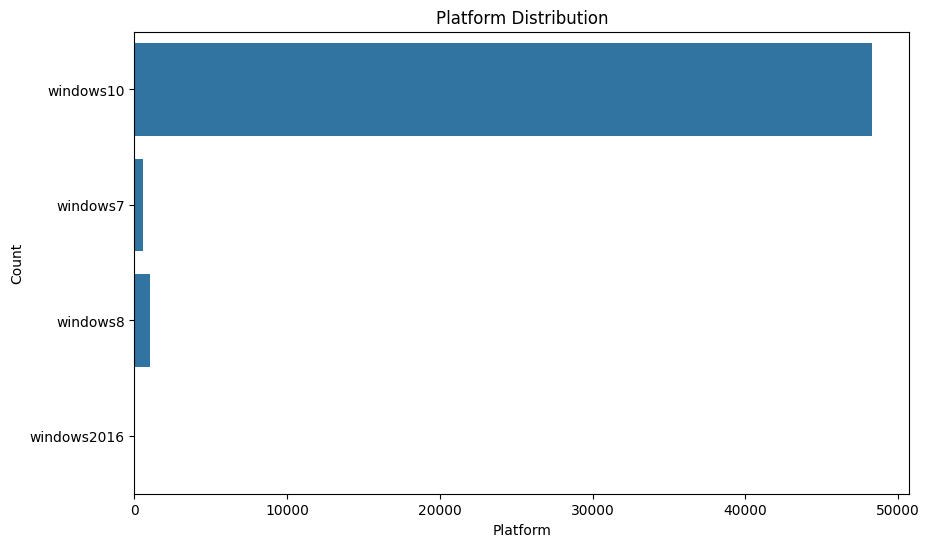

In [ ]:
# Bar plot for Platform distribution
plt.figure(figsize=(10,6))
sns.countplot(data['Platform'])
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()


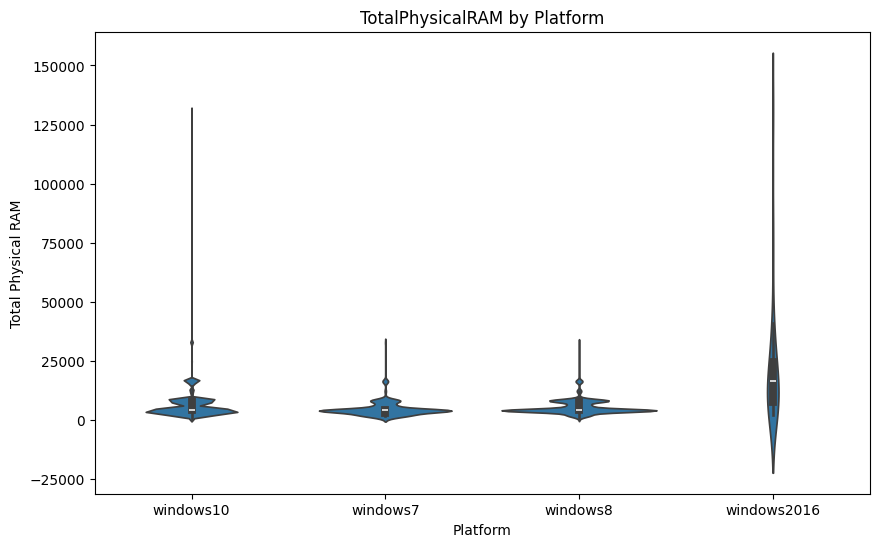

In [ ]:
# Violin plot for TotalPhysicalRAM by Platform
plt.figure(figsize=(10,6))
sns.violinplot(x='Platform', y='TotalPhysicalRAM', data=data)
plt.title('TotalPhysicalRAM by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Physical RAM')
plt.show()


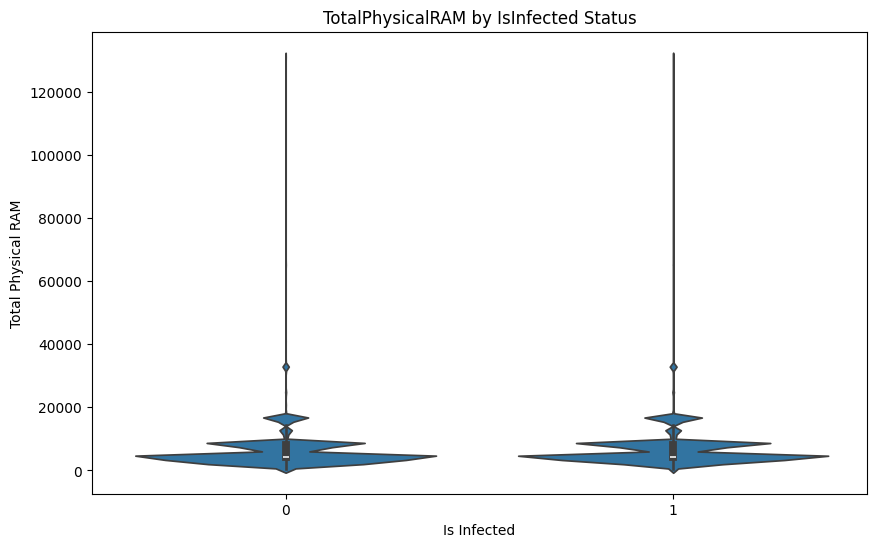

In [ ]:
# Violin plot for TotalPhysicalRAM by IsInfected status
plt.figure(figsize=(10,6))
sns.violinplot(x='IsInfected', y='TotalPhysicalRAM', data=data)
plt.title('TotalPhysicalRAM by IsInfected Status')
plt.xlabel('Is Infected')
plt.ylabel('Total Physical RAM')
plt.show()

Step 9: Identify Patterns, Correlations, and Anomalies

In this step, we analyze the visualizations and statistical outputs to draw meaningful insights. This involves identifying patterns, correlations, and anomalies in the data, and formulating initial hypotheses that can guide further analysis or inform decision-making.

* Identifying Patterns: Patterns in data can help understand underlying trends and relationships. Here are some common patterns to look for:

* Strong correlations: Identify pairs of variables with high absolute correlation values.

* Weak correlations: Identify pairs of variables with low absolute correlation values, indicating potential anomalies.

* Identifying Anomalies: Anomalies are unusual patterns or outliers that deviate from the expected behavior. Detecting anomalies can be crucial for identifying potential issues or unique characteristics in the data.






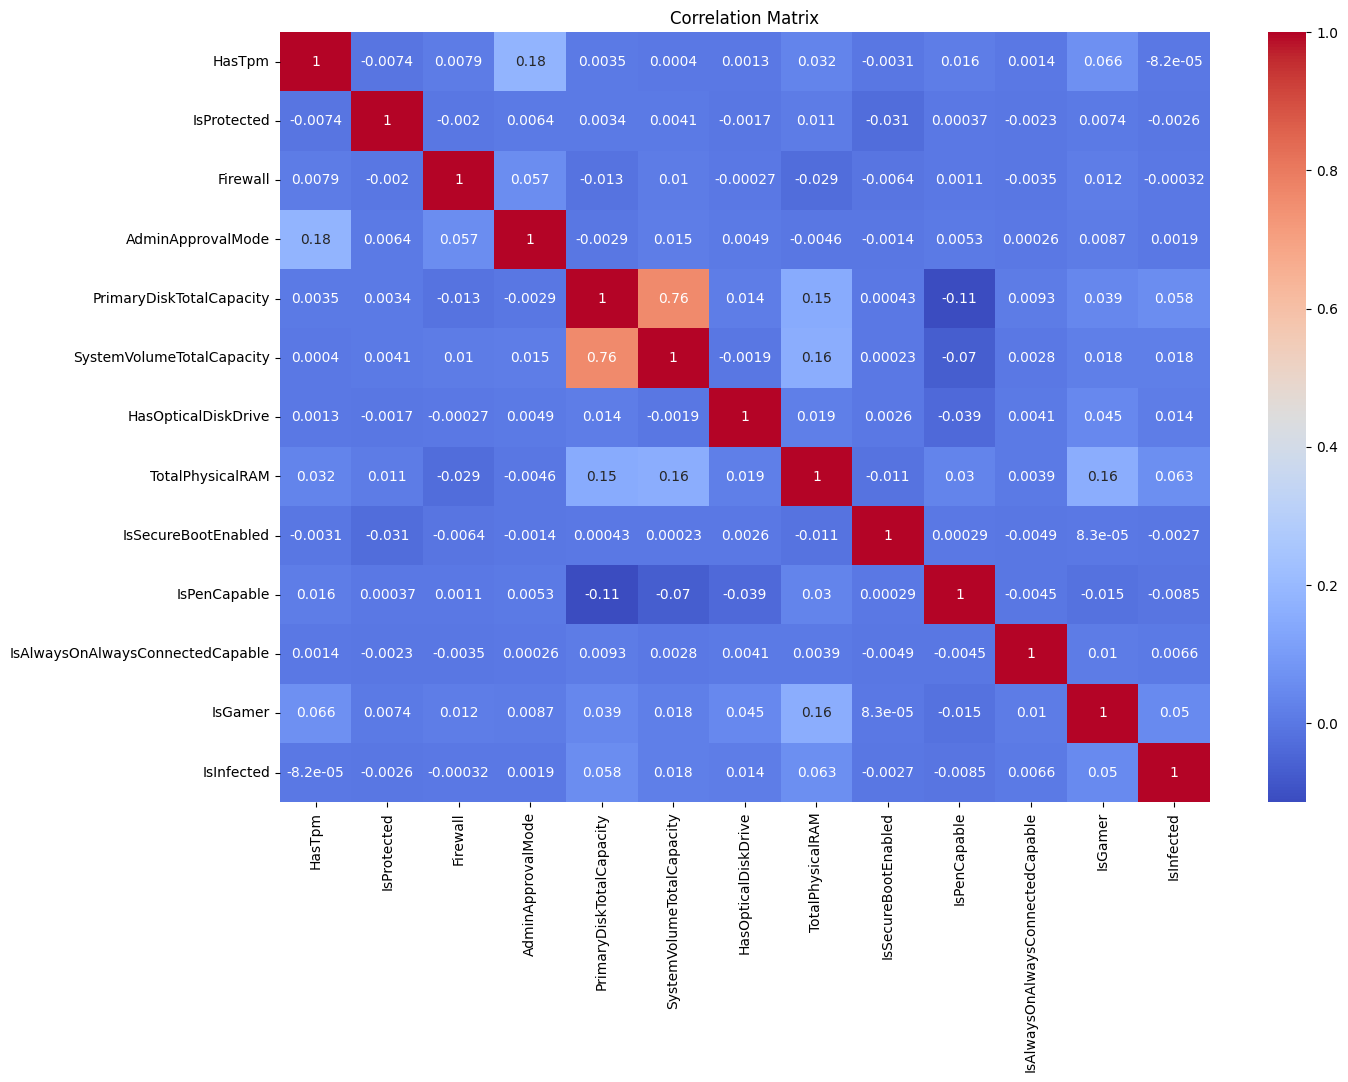

                                    HasTpm  IsProtected  Firewall  \
HasTpm                            1.000000    -0.007403  0.007877   
IsProtected                      -0.007403     1.000000 -0.002008   
Firewall                          0.007877    -0.002008  1.000000   
AdminApprovalMode                 0.177860     0.006442  0.057472   
PrimaryDiskTotalCapacity          0.003541     0.003435 -0.013018   
SystemVolumeTotalCapacity         0.000396     0.004077  0.010129   
HasOpticalDiskDrive               0.001314    -0.001727 -0.000267   
TotalPhysicalRAM                  0.031548     0.010535 -0.028951   
IsSecureBootEnabled              -0.003080    -0.030779 -0.006422   
IsPenCapable                      0.015761     0.000370  0.001147   
IsAlwaysOnAlwaysConnectedCapable  0.001413    -0.002302 -0.003510   
IsGamer                           0.066326     0.007426  0.012178   
IsInfected                       -0.000082    -0.002636 -0.000317   

                                 

In [ ]:
# Ensure 'data' is your DataFrame
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Drawing Insights
# Display the correlation matrix
print(correlation_matrix)




In [ ]:
# Identify strong correlations (absolute value > 0.75)
strong_correlations = correlation_matrix[(correlation_matrix >= 0.75) | (correlation_matrix <= -0.75)].stack().reset_index()
strong_correlations = strong_correlations[strong_correlations['level_0'] != strong_correlations['level_1']]
strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
print("Strong Correlations:")
print(strong_correlations)

Strong Correlations:
                  Variable 1                 Variable 2  Correlation
5   PrimaryDiskTotalCapacity  SystemVolumeTotalCapacity     0.762494
6  SystemVolumeTotalCapacity   PrimaryDiskTotalCapacity     0.762494


In [ ]:
# Identifying Anomalies
# Threshold for considering a correlation weak (absolute value < 0.1)
weak_correlations = correlation_matrix[(correlation_matrix > -0.1) & (correlation_matrix < 0.1)].stack().reset_index()
weak_correlations = weak_correlations[weak_correlations['level_0'] != weak_correlations['level_1']]
weak_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
print("Weak or No Correlations (Anomalies):")
print(weak_correlations)

Weak or No Correlations (Anomalies):
     Variable 1                        Variable 2  Correlation
0        HasTpm                       IsProtected    -0.007403
1        HasTpm                          Firewall     0.007877
2        HasTpm          PrimaryDiskTotalCapacity     0.003541
3        HasTpm         SystemVolumeTotalCapacity     0.000396
4        HasTpm               HasOpticalDiskDrive     0.001314
..          ...                               ...          ...
139  IsInfected                  TotalPhysicalRAM     0.062630
140  IsInfected               IsSecureBootEnabled    -0.002746
141  IsInfected                      IsPenCapable    -0.008477
142  IsInfected  IsAlwaysOnAlwaysConnectedCapable     0.006650
143  IsInfected                           IsGamer     0.049776

[144 rows x 3 columns]


Formulating Initial Hypotheses
Based on the identified patterns and anomalies, formulate initial hypotheses that can be tested further. These hypotheses provide a starting point for deeper analysis and can help in understanding the relationships between variables.

In [ ]:
# Formulating hypotheses
hypotheses = []

# Example hypotheses based on correlation
for col in correlation_matrix.columns:
    correlated_features = correlation_matrix[col][(correlation_matrix[col] >= 0.75) | (correlation_matrix[col] <= -0.75)].index.tolist()
    for feature in correlated_features:
        if feature != col:
            if correlation_matrix[col][feature] > 0:
                hypotheses.append(f"Hypothesis: {col} and {feature} are positively correlated, possibly indicating that an increase in {col} leads to an increase in {feature}.")
            else:
                hypotheses.append(f"Hypothesis: {col} and {feature} are negatively correlated, possibly indicating that an increase in {col} leads to a decrease in {feature}.")


In [ ]:
# Display hypotheses
for hypothesis in hypotheses:
    print(hypothesis)

Hypothesis: PrimaryDiskTotalCapacity and SystemVolumeTotalCapacity are positively correlated, possibly indicating that an increase in PrimaryDiskTotalCapacity leads to an increase in SystemVolumeTotalCapacity.
Hypothesis: SystemVolumeTotalCapacity and PrimaryDiskTotalCapacity are positively correlated, possibly indicating that an increase in SystemVolumeTotalCapacity leads to an increase in PrimaryDiskTotalCapacity.


Step 10: Summarize Findings

This step-by-step workflow ensures a thorough and systematic approach to data analysis, enabling you to uncover valuable insights from your dataset.

In [ ]:
# Summarize findings in a report format
summary_report = """
Summary of Findings:

1. Data Overview:
   - The dataset contains X rows and Y columns.
   - The data types and missing values have been inspected.

2. Summary Statistics:
   - The dataset has the following summary statistics:
   [Include key statistics here]

3. Visualizations:
   - Histograms and box plots were used for univariate analysis.
   - A correlation heatmap and scatter plots were used for bivariate analysis.

4. Advanced Analysis:
   - Grouping and aggregation by [categorical_column] revealed the following:
   [Include key insights here]

5. Insights:
   - Strong Correlations:
     [Include strong correlations here]

   - Anomalies:
     [Include anomalies here]

   - Hypotheses:
     [List formulated hypotheses here]

6. Advanced Visualizations:
   - Bar plots and violin plots provided deeper insights into categorical and numerical relationships.
"""

print(summary_report)



Summary of Findings:

1. Data Overview:
   - The dataset contains X rows and Y columns.
   - The data types and missing values have been inspected.

2. Summary Statistics:
   - The dataset has the following summary statistics:
   [Include key statistics here]

3. Visualizations:
   - Histograms and box plots were used for univariate analysis.
   - A correlation heatmap and scatter plots were used for bivariate analysis.

4. Advanced Analysis:
   - Grouping and aggregation by [categorical_column] revealed the following:
   [Include key insights here]

5. Insights:
   - Strong Correlations:
     [Include strong correlations here]

   - Anomalies:
     [Include anomalies here]

   - Hypotheses:
     [List formulated hypotheses here]

6. Advanced Visualizations:
   - Bar plots and violin plots provided deeper insights into categorical and numerical relationships.

